# Module 7: Pandas Series & Data Frames

## What is Pandas?

- The name "Pandas" is derived from the term "__Pan__el __Da__ta"


- The term "panel data" is used in statistics and econometrics to refer to data sets that include observations over multiple time periods for the same entities.


- Pandas is a library of pre-built data structures and data manipulation tools designed to make the cleaning and analysis of data relatively fast and easy within Python.


- Like NumPy, the underlying code has been optimized for speed of computation


- 'Series' and 'Data Frames', the two primary Pandas data structures, are essentially NumPy arrays that have been extended to include functionality that allows users to define their own row & column labels. This feature enables far more flexibility in how users can manage + access data than is available with NumPy's integer-based row/column indexing scheme.


- Pandas is used in conjunction with virtually every Python-based analytical and graphics package (e.g., scikit-learn, matplotlib, statsmodels, Seaborn, Plotly, etc.)


- Becoming adept at the use of Pandas is necessary for any Python user wishing to become proficient in data analytics and visualization.



## Getting Started With Pandas

In [ ]:
# load the pandas library
import pandas as pd

# We're importing NumPy here for purposes of demonstrating similarities + 
# differences to Pandas objects
import numpy as np

# OPTIONAL: load the Series and DataFrame functions if you want to avoid the use of 
# the 'pd' predicate every time you want to create a new Series or 
# DataFrame object.
from pandas import Series, DataFrame

## Pandas Series Objects

- One dimensional (similar to NumPy 1D array)


- Comprised of a set of data values + a corresponding set of user-definable index values.

In [ ]:
# define a 1D NumPy array so we can compare to a Pandas Series object
NP1D = np.array([11, 28, 72, 3, 5, 8])
NP1D

array([11, 28, 72,  3,  5,  8])

In [ ]:
# Now define a Pandas series using the same data: 
# note similarity to how a NumPy array is defined
# but how the structure of the resulting object contains an explicit column
# of index values (shown to the left of the data)
S = pd.Series([11, 28, 72, 3, 5, 8])
S

0    11
1    28
2    72
3     3
4     5
5     8
dtype: int64

In the above output, the left column contains the default index values assigned to the Series by Pandas. The right column contains the actual data elements we are placing into the Series object.


Next, we access the index and the values directly:

In [ ]:
# access the index for the Series
print(S.index)
print(" ")

# access the actual data values within the Series
print(S.values)

RangeIndex(start=0, stop=6, step=1)
 
[11 28 72  3  5  8]


Note the zero-based characteristic of the index: Does this look familiar?


Now let's define a series and assign our own index values to it:

In [ ]:
# define a series + assign our own index values to it
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print(obj2)
print(" ")
print(obj2.index)

d    4
b    7
a   -5
c    3
dtype: int64
 
Index(['d', 'b', 'a', 'c'], dtype='object')


Now we can access our data using the index values we defined:

In [ ]:
print(obj2['a'])

# change the value of the element associated with index value 'd'
print(obj2['d'])
obj2['d'] = 6

print(obj2['d'])

# display the values associated with index values 'c', 'a', and 'd'
obj2[['c', 'a', 'd']]

-5
4
6


c    3
a   -5
d    6
dtype: int64

In [ ]:
# apply a boolean test to a Series
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

The index/data value relationship in a Pandas Series or DataFrame is very similar to the key/value relationships we saw in Python __dict__ objects:

In [ ]:
# check to see if a 'key' value exists within the index of the series
print('b' in obj2)
'e' in obj2

True


False

### Create a Pandas Series from a Python Dict

In [ ]:
# define a Python dict object
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
print(type(sdata))

# convert the dict to a series: the dict's key values become the index of the series
obj3 = pd.Series(sdata)
obj3

<class 'dict'>


Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

### 'NaN': How Pandas Indicates Missing Data Values

In [ ]:
# define a dict with a missing data value
sdata2 = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': None }

# convert the dict to a series
obj4 = pd.Series(sdata2)
obj4

Ohio      35000.0
Texas     71000.0
Oregon    16000.0
Utah          NaN
dtype: float64

In [ ]:
# test for missing values in the series
print(pd.isnull(obj4))

# use the built-in ufunc 'isnull() to test for missing values'
print(obj4.isnull())

# test for non-null values in the series
pd.notnull(obj4)

Ohio      False
Texas     False
Oregon    False
Utah       True
dtype: bool
Ohio      False
Texas     False
Oregon    False
Utah       True
dtype: bool


Ohio       True
Texas      True
Oregon     True
Utah      False
dtype: bool

In [ ]:
# add values from 2 series
obj3 + obj4

Ohio       70000.0
Texas     142000.0
Oregon     32000.0
Utah           NaN
dtype: float64

Note the NaN result above for Utah: it is not possible to perform addition on an undefined value!!


What happens if we try to add the values of two series whose key values __do not__ align?

In [ ]:
ndata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
print(type(ndata))

nobj1 = pd.Series(ndata)

pdata =  {'Virginia': 22000, 'Texas': 71000, 'Washington': 46000, 'Utah': 1000}
print(type(pdata))

nobj2 = pd.Series(pdata)

nobj1 + nobj2

<class 'dict'>
<class 'dict'>


Ohio               NaN
Oregon             NaN
Texas         142000.0
Utah            6000.0
Virginia           NaN
Washington         NaN
dtype: float64

### Pandas Index Values Can Be Changed "In Place"

In [ ]:
print(nobj2)

# rename the indices for series object 'nobj2'
nobj2.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
nobj2

Virginia      22000
Texas         71000
Washington    46000
Utah           1000
dtype: int64


Bob      22000
Steve    71000
Jeff     46000
Ryan      1000
dtype: int64

## Pandas DataFrame Objects

- Data Frames are rectangular, ordered collection of columns


- Columns can be of different data types


- Data frames have indices that enable access to both the rows and columns.


- As with Pandas Series objects, DataFrame column index names can be assigned by a user. Row indices can also be assigned by a user if needed.



Let's compare a NumPy 2D array to a Pandas data frame:


In [ ]:
# define a 2D NumPy array so we can compare it to a Pandas DataFrame
# define a 2x3 array
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
# now define a Pandas DataFrame using the same data
# note similarity to how a NumPy 2D array is defined
# but how the structure of the resulting object contains explicit row + column
# index values (shown to the left and above of the data)
df1 = pd.DataFrame([[1., 2., 3.], [4., 5., 6.]])
df1

,0,1,2
0,1.0,2.0,3.0
1,4.0,5.0,6.0


In [ ]:
# example from page 131 of "Python for Data Analysis"

# first, the author defines a dict of key/value pairs
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

# then define the DataFrame, assigning your own names to the column + row indices
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2


,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


Note that the author specified 4 column names when there were only 3 columns of data defined within the 'data' dictionary. Pandas will automatically create that fourth column, but assigns a value of 'NaN' ('Not a number') to each column element within it.

In [ ]:
# display the column index for the data frame
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

### Retrieving, Accessing, and Adding DataFrame Columns

DataFrame columns can be retrieved as a Pandas Series object

In [ ]:
# retrieve column using col name in quotes within brackets
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [ ]:
# retrieve column using column name as an attribute of the DataFrame object
# NOTE: this only works if the column name is not a Python method/function name
# or Python keyword
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [ ]:
# add a new column based on a logic test:
# in this example, all 'state' values of 'Ohio' are assigned an 'eastern'
# value of 'True' while all other are assigned 'False'
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,NaN,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,NaN,False
five,2002,Nevada,2.9,NaN,False
six,2003,Nevada,3.2,NaN,False


In [ ]:
# delete an unwanted column
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [ ]:
# transpose the rows and columns of a data frame
# NOTE: This does NOT transpose the data frame 'in place'
# so if you want a transposed version, assign the output 
# of this line of code to a new variable name
frame2.T

,one,two,three,four,five,six
year,2000,2001,2002,2001,2002,2003
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
pop,1.5,1.7,3.6,2.4,2.9,3.2
debt,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# frame2 has not been transposed "in place"
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


### Indexing, Selection & Filtering of Pandas Series + DataFrames


#### Indexing for Series Objects

In [ ]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj


a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [ ]:
# get the data value from the series element corresponding to index 'b'
obj['b']

1.0

In [ ]:
# get the data values from series elements corresponding to indices 'b', 
# 'a' & 'd'
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [ ]:
# get data values corresponding to series elements in index positions 1 & 3
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [ ]:
# assign the value of 5 to all elements between + inclusive of 
# indices 'b' & 'c'
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

#### Indexing for DataFrame Objects

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
# display the values of the column having an index name of 'two'
data['two']


Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [ ]:
# display the values of the columns having an index names of 'three' & 'one'
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [ ]:
# display the content of all rows having indices < 2
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [ ]:
# display content of all rows where the value in the 'three' column is > 5
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
# apply a logic test to the entire data frame
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


#### Selecting / Filtering Data Using Column Names

In [ ]:
# reprint 'frame2' so we can easily refer to its contents
print(frame2)

       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN


In [ ]:
# 'select state, pop from frame2 where year == 2002'
# note you need to use double brackets if you are specifying more than one
# column for 'selection'
frame2[(frame2['year']== 2002)][["state", "pop"]]

,year,state,pop
three,2002,Ohio,3.6
five,2002,Nevada,2.9


In [ ]:
# 'select pop from frame2 where year == 2002 and state == Ohio'
frame2[(frame2['year']== 2002) & (frame2['state'] == 'Ohio')]["pop"]

three    3.6
Name: pop, dtype: float64

## Accessing Data with 'loc' & 'iloc'

- Subset rows + columns of a DataFrame using either the axis label values ('__loc__') or integer index values ('__iloc__')

In [ ]:
# reprint data object for ease of reference
print(data)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [ ]:
# subset columns having labels 'two' and 'three' for the row having
# label 'Colorado'
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [ ]:
# subset columns 3, 0, 1 (in that order) from row having index value of 
# 2 of the data frame
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [ ]:
# get row having index value of 2 from the data frame
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [ ]:
# get all rows having integer index >= 1 and all columns having an integer
# index < 3
data.iloc[1:, :3]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


In [ ]:
# get all rows having an integer index < 2 and all columns having an integer
# index >= 1
data.iloc[:2, 1:]

,two,three,four
Ohio,1,2,3
Colorado,5,6,7


In [ ]:
# for all rows, subset only those whose column 'one' values are <= 8 and whose 
# column index value is < 3
data.iloc[:, :3][data.one <= 8]

,one,two,three
Ohio,0,1,2
Colorado,4,5,6
Utah,8,9,10


In [ ]:
# example of using multiple conditional tests with iloc
data.iloc[:, :3][(data.one <= 8) & (data.two < 6)]

,one,two,three
Ohio,0,1,2
Colorado,4,5,6


## Summarizing & Computing Descriptive Statistics

In [ ]:
# display frame2
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [ ]:
# get descriptive statistics for a DataFrame column
frame2['pop'].describe()

count    6.000000
mean     2.550000
std      0.836062
min      1.500000
25%      1.875000
50%      2.650000
75%      3.125000
max      3.600000
Name: pop, dtype: float64

In [ ]:
# get just the mean from the descriptive statistics
frame2['pop'].describe()['mean']

2.5500000000000003

In [ ]:
# get descriptive stats for a column containing string values
frame2['state'].describe()

count          6
unique         2
top       Nevada
freq           3
Name: state, dtype: object

## Quick Visualizations with Pandas Objects

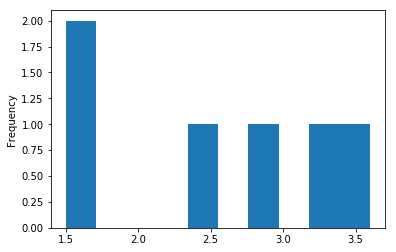

In [ ]:
# create a histogram of frame2's 'pop' column's values 
frame2['pop'].plot(kind = 'hist')

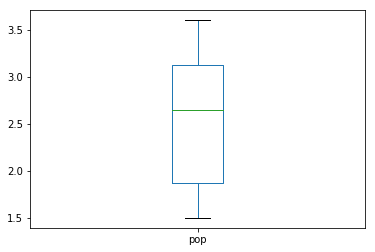

In [ ]:
# create a boxplot of frame2's 'pop' column's values 
frame2['pop'].plot(kind = 'box')

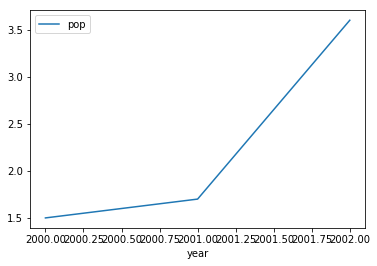

In [ ]:
# line plot of Ohio's population by year
fplot = frame2[frame2['state'] == 'Ohio'].plot(x = 'year', y = 'pop')
# place a semicolon after plot name to suppress matplotlib info at top of plot
fplot;

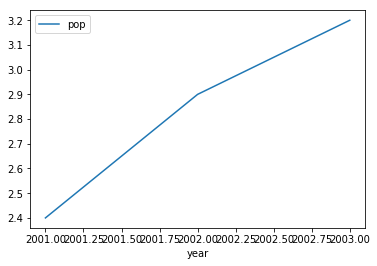

In [ ]:
# line plot of Nevada's population by year
fplot = frame2[frame2['state'] == 'Nevada'].plot(x = 'year', y = 'pop')
fplot;

# Data I/O With Pandas

In [ ]:
# load the pandas + numpy libraries
import pandas as pd
import numpy as np

In [ ]:
# read contents of a csv file from GitHub into a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
# read a file that has no column headers
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
# assign column names while reading the file
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
# assign the contents of a specific column to serve as the row index
# for the data frame
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


### Create a hierarchical index using 2 columns

In [ ]:
# display the contents of the file
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/csv_mindex.csv')


,key1,key2,value1,value2
0,one,a,1,2
1,one,b,3,4
2,one,c,5,6
3,one,d,7,8
4,two,a,9,10
5,two,b,11,12
6,two,c,13,14
7,two,d,15,16


In [ ]:
# use the columns labeled 'key1' & 'key2' as the hierarchical index keys
parsed = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/csv_mindex.csv',
                     index_col=['key1', 'key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

### What if we have no explicit field delimeters?

What if a file contains tabular data that has no fixed delimeter (e.g., it uses whitespace or some other pattern to separate the data fields)?

Here's an example from the author:
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex3.txt

We can use a 'regular expression' to parse the file

(*NOTE: We'll be learning more about regular expressions later in the semester*)

In [ ]:
# pass a regular expression: 's' indicates whitespace; '+' indicates that we should skip
# all whitespace following the end of a non-whitespace character to find the next
# valid data item
result = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex3.txt', sep='\s+')
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


NOTE: Since there was no column heading given at the top of the first column, read_csv() has infered that the first column should be used as the row index.

### Skipping Rows While Reading a File

In [ ]:
# this file contains extraneous data that should be ignored
# look what happens when we try to read it
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex4.csv')

,,,,# hey!
a,b,c,d,message
# just wanted to make things more difficult for you,NaN,NaN,NaN,NaN
# who reads CSV files with computers,anyway?,NaN,NaN,NaN
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [ ]:
# specify rows to ignore using the 'skiprows' parameter
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### What happens if data values are missing?

Pandas will assign 'NaN' to missing data values by default.

In [ ]:
result = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [ ]:
# test each data value within the data frame for missing data
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


### Very Large Files: How to Avoid Reading Too Much Data Into Memory At Once

We can specify how many rows to read or define a "chunksize" to enable automatic iteration through the file

In [ ]:
# limit number of rows read using 'nrows' parameter
pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [ ]:
# define a fixed-size 'chunksize' where 'chunksize' indicates the number of lines to be read
# from the file
chunker = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex3.txt', chunksize=1000)
chunker

In [ ]:
# read through the file using chunksize = 1000
chunker = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex6.csv', chunksize=1000)

# define a Series object to store the results of calculations
tot = pd.Series([])

# now iteratively read through the file, summing value counts of rows having
# similar 'key' values
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)

# sort the summed results in descending order
tot = tot.sort_values(ascending=False)

In [ ]:
# display the first 10 summed values
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

### Other Formats?

The balance of Chapter 6 provides easy to follow examples of how to read various file formats. Since that content is somewhat repetitive, it is not covered as part of this lecture. However, you should still become familiar with the basics of how to read other non-CSV formats (e.g., Excel, JSON, XML, HTML, etc.) into Pandas objects (particularly if you would like to work with data in those formats for any of your upcoming assignments/projects). 

We will be revisiting Chapter 6 during Module 9, when we focus on working with Web data.



## Case Study: Getting Started with Pandas

A famous dataset about mushrooms can be found in the UCI repository here: https://archive.ics.uci.edu/ml/datasets/mushroom

 Your task is to study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there! You should take the data, and create a data frame with a subset of the columns (and if you like rows) in the dataset. You should include the column that indicates edible or poisonous and three or four other columns. You should also add meaningful column names and replace the abbreviations used in the data—for example, in the appropriate column, “e” might become “edible.”

Here's a pd.read_csv() function call that will load the data set for you:


In [ ]:
# load the data set
import pandas as pd

mr_df = pd.read_csv("https://raw.githubusercontent.com/jtopor/DAV-5400/master/Week5/agaricus-lepiota.data", header = None)

In [ ]:
# sanity check - make sure data was read in as expected
mr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# NOTE: number of columns in data frame is 1 more than number of attributes
# described in data set. Why? First column is 'edible/poisonous' indicator
len(mr_df.columns)


23

1. Create a dataframe with a subset of the columns that includes the 'edible/poisonous' indicator and at least 3-4 other columns.

*Example: Use 'edible', 'cap shape', 'cap color', 'odor', and 'habitat'*

In [ ]:
# create a subset of 5 columns, including 'edible' + 'poisonous'
# use the 'copy()' function if you want to preserve the original data frame
mr_sub = mr_df.iloc[:, [0, 1, 3, 5, 22]].copy()

In [ ]:
# check results: do we have the 5 columns we want? Check the first 10 rows
mr_sub.head(10)

,0,1,3,5,22
0,p,x,n,p,u
1,e,x,y,a,g
2,e,b,w,l,m
3,p,x,w,p,u
4,e,x,g,n,g
5,e,x,y,a,g
6,e,b,w,a,m
7,e,b,w,l,m
8,p,x,w,p,g
9,e,b,y,a,m


2. Truncate the new data frame to reduce the number of rows

In [ ]:
# take the first 100 rows and store them in a new data frame
# use the copy() function if you want to preserve the original data frame
mr_sub_tr = mr_sub.iloc[:100,:].copy()

In [ ]:
# sanity check: were we successful in truncating the dataframe to 100 rows?
mr_sub_tr.shape

(100, 5)

3. Add meaningful column names

In [ ]:
# add meaningful column names
mr_sub_tr.columns = ['Edible', 'Cap_Shape', 'Cap_Color', 'Odor', 'Habitat']

# sanity check
mr_sub_tr.head(5)

,Edible,Cap_Shape,Cap_Color,Odor,Habitat
0,p,x,n,p,u
1,e,x,y,a,g
2,e,b,w,l,m
3,p,x,w,p,u
4,e,x,g,n,g


4. Replace the single letter abbreviations used in the data with more descriptive character strings

In [ ]:
# replace Edible col values
mr_sub_tr.Edible.replace('e', 'edible', inplace = True)
mr_sub_tr.Edible.replace('p', 'poisonous', inplace = True)

# replace Cap Shape col values
mr_sub_tr.Cap_Shape.replace('b', 'bell', inplace = True)
mr_sub_tr.Cap_Shape.replace('c', 'conical', inplace = True)
mr_sub_tr.Cap_Shape.replace('x', 'convex', inplace = True)
mr_sub_tr.Cap_Shape.replace('f', 'flat', inplace = True)
mr_sub_tr.Cap_Shape.replace('k', 'knobbed', inplace = True)
mr_sub_tr.Cap_Shape.replace('s', 'sunken', inplace = True)

mr_sub_tr.head(10)



,Edible,Cap_Shape,Cap_Color,Odor,Habitat
0,poisonous,convex,n,p,u
1,edible,convex,y,a,g
2,edible,bell,w,l,m
3,poisonous,convex,w,p,u
4,edible,convex,g,n,g
5,edible,convex,y,a,g
6,edible,bell,w,a,m
7,edible,bell,w,l,m
8,poisonous,convex,w,p,g
9,edible,bell,y,a,m


In [ ]:
# replace Cap Color values using a dict
mr_sub_tr.Cap_Color.replace({'n': 'brown', 
                             'b': 'buff',
                             'c': 'cinnamon',
                             'g': 'gray',
                             'r': 'green',
                             'p': 'pink',
                             'u': 'purple',
                             'e': 'red',
                             'w': 'white',
                             'y': 'yellow'}, inplace = True)
 
    
mr_sub_tr.head(10)

# replace Odor col values



# replace Habitat col values


,Edible,Cap_Shape,Cap_Color,Odor,Habitat
0,poisonous,convex,brown,p,u
1,edible,convex,yellow,a,g
2,edible,bell,white,l,m
3,poisonous,convex,white,p,u
4,edible,convex,gray,n,g
5,edible,convex,yellow,a,g
6,edible,bell,white,a,m
7,edible,bell,white,l,m
8,poisonous,convex,white,p,g
9,edible,bell,yellow,a,m


In [ ]:
# now do some basic subsetting
# get rows where Cap_Shape == flat and Cap_Color == gray
mr_sub_tr[(mr_sub_tr['Cap_Shape']== 'flat') & (mr_sub_tr['Cap_Color'] == 'gray')]

,Edible,Cap_Shape,Cap_Color,Odor,Habitat
56,edible,flat,gray,n,g
82,edible,flat,gray,n,u


In [ ]:
# get Habitat values from rows where Cap_Shape == flat and Cap_Colr == gray
mr_sub_tr[(mr_sub_tr['Cap_Shape']== 'flat') & (mr_sub_tr['Cap_Color'] == 'gray')].Habitat

56    g
82    u
Name: Habitat, dtype: object

In [ ]:
# get descriptive statistics for Cap_Color
# remember: Cap_Color is a categorical variable, so the output of the 
# describe() function is different from what you would get if you 
# were working with a numeric variable
mr_sub_tr.Cap_Color.describe()

count        100
unique         4
top       yellow
freq          37
Name: Cap_Color, dtype: object

The results shown above tell us that for our 100 row subset we have 4 unique Cap_Color values. The most frequently occurring Cap_Color value within the 100 row subset is 'yellow': it appears 37 times within the 100 row subset